In [38]:
import pandas as pd
df = pd.read_excel('Goals & Assist_selected.xlsx')
df.to_csv('Goals&Assist_.csv', index=False)

In [39]:
df = pd.read_csv('Goals&Assist_.csv')

In [40]:
df = df.drop_duplicates()
df = df.ffill()
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [41]:
important_cols = [
    'position', 'age', 'matches_played', 'starts', 'minutes', '90s_played',
    'goals', 'assists', 'goals_per_90', 'assists_per_90',
    'non-penalty_goals_per_90', 'xg_per_90', 'xag_per_90', 'npxg_per_90'
]
df = df[important_cols]

In [42]:
df.to_excel("final_cleaned_Goals&assists.xlsx", index=False)

In [43]:
import numpy as np

In [44]:
print("Nulls before:\n", df.isnull().sum())
df = df.ffill().bfill()
print("\nNulls after:\n", df.isnull().sum())

Nulls before:
 position                    0
age                         0
matches_played              0
starts                      0
minutes                     0
90s_played                  0
goals                       0
assists                     0
goals_per_90                0
assists_per_90              0
non-penalty_goals_per_90    0
xg_per_90                   0
xag_per_90                  0
npxg_per_90                 0
dtype: int64

Nulls after:
 position                    0
age                         0
matches_played              0
starts                      0
minutes                     0
90s_played                  0
goals                       0
assists                     0
goals_per_90                0
assists_per_90              0
non-penalty_goals_per_90    0
xg_per_90                   0
xag_per_90                  0
npxg_per_90                 0
dtype: int64


In [45]:
print("\nDuplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())


Duplicates before: 217
Duplicates after: 0


In [46]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    Q1, Q3 = df[col].quantile([0.05, 0.95]) 
    IQR = Q3 - Q1
    lower, upper = Q1 - 2 * IQR, Q3 + 2 * IQR  
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [47]:
print("\nFinal check:")
print("Nulls:", df.isnull().sum().sum())
print("Duplicates:", df.duplicated().sum())


Final check:
Nulls: 0
Duplicates: 0


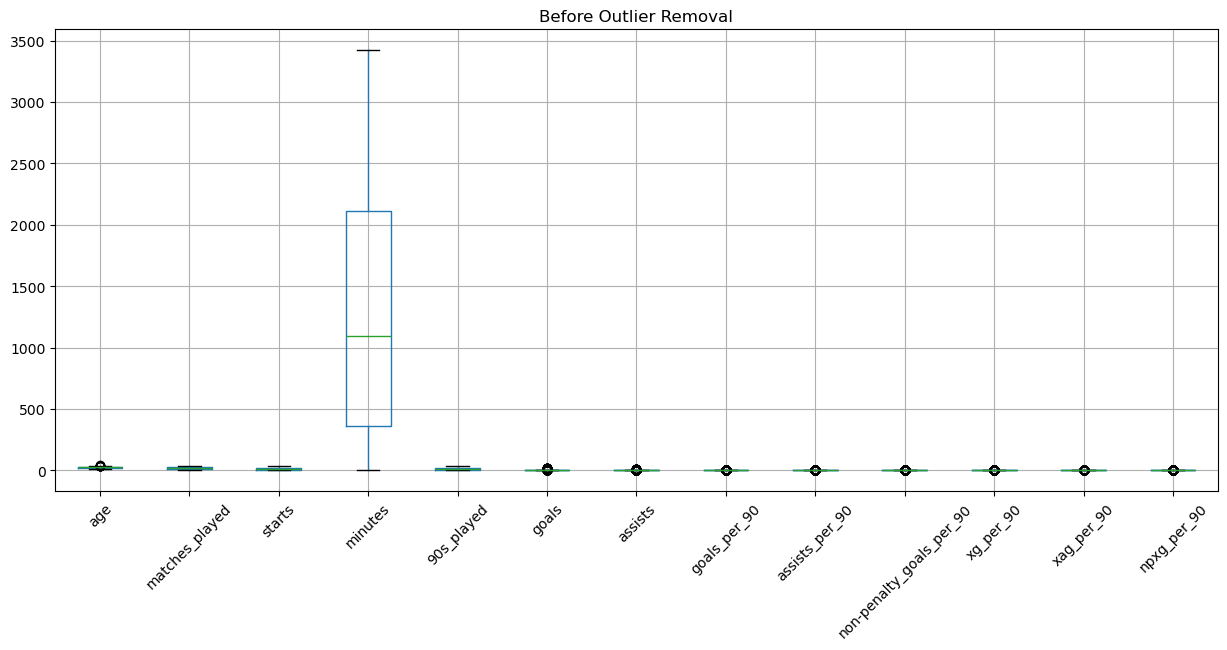

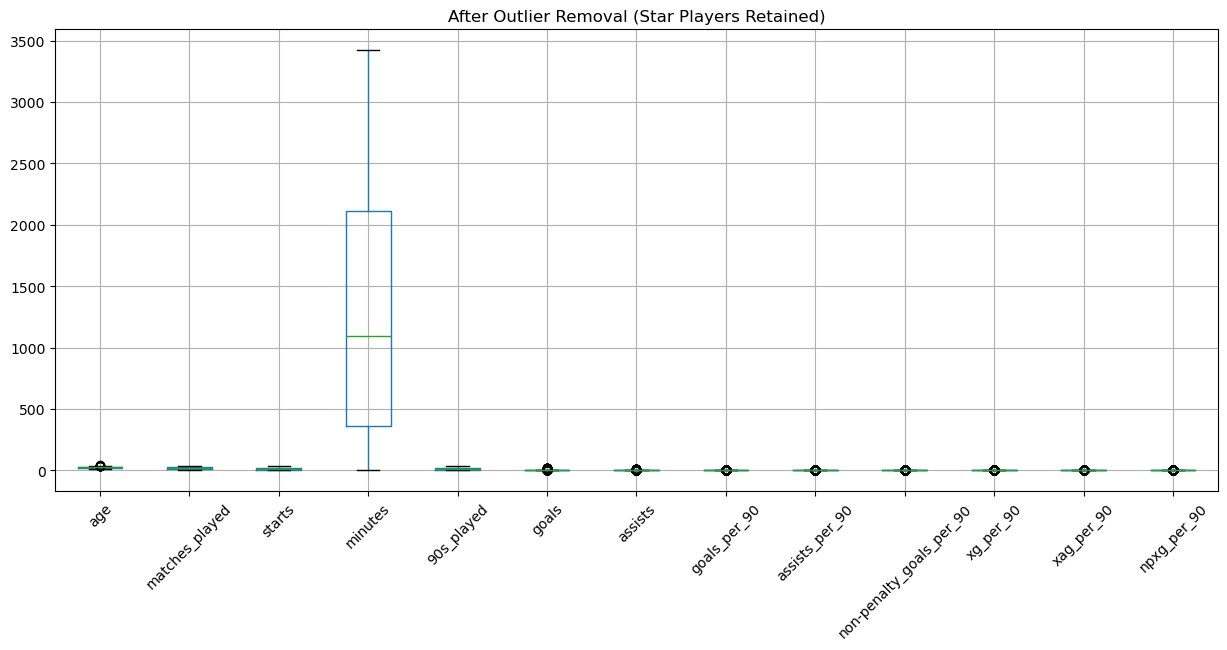

In [48]:
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Before cleaning
plt.figure(figsize=(15,6))
df[num_cols].boxplot(rot=45)
plt.title("Before Outlier Removal")
plt.show()

# After cleaning
plt.figure(figsize=(15,6))
df[num_cols].boxplot(rot=45)
plt.title("After Outlier Removal (Star Players Retained)")
plt.show()


In [49]:
df.to_excel("final_cleaned_Goals&assists_no_outliers.xlsx", index=False)

In [50]:
# Encode Categorical Columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Automatically encode any non-numeric columns
for col in X.columns:
    if X[col].dtype == 'object':  # if column has string values
        X[col] = le.fit_transform(X[col])
        print(f"Encoded column: {col}")


In [51]:
#Define Features (X) and Target (y)
target_column = 'goals'   # or 'assists' / 'goal_contributions'
X = df.drop(columns=[target_column])
y = df[target_column]

#Encode Categorical Columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])
        print(f"Encoded column: {col}")

#Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Encoded column: position



Linear Regression Results:
MAE: 0.766
RMSE: 1.269
R² Score: 0.744

Ridge Regression Results:
MAE: 0.789
RMSE: 1.299
R² Score: 0.732

Random Forest Results:
MAE: 0.078
RMSE: 0.291
R² Score: 0.987

 Model Performance Comparison:
               Model       MAE      RMSE  R² Score
0  Linear Regression  0.765697  1.269039  0.744315
1   Ridge Regression  0.789387  1.298515  0.732300
2      Random Forest  0.077912  0.291123  0.986544


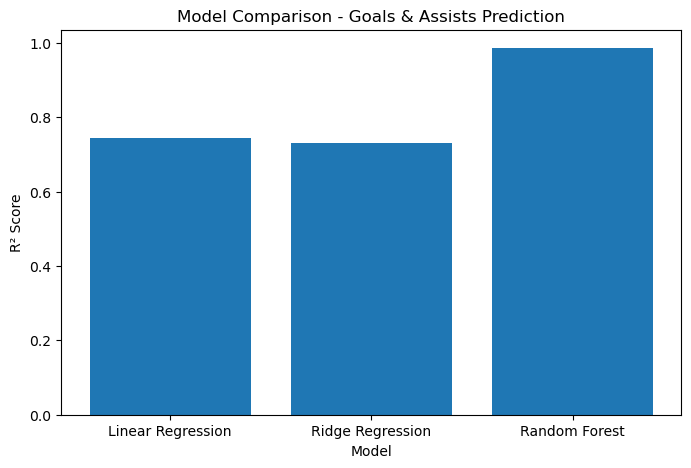


 Best Performing Model: Random Forest


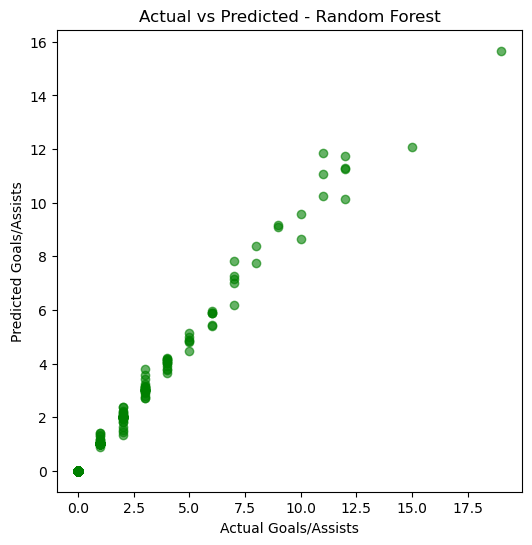

In [52]:
#Initialize Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

#Train and Evaluate Each Model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    })
    print(f"\n{name} Results:")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R² Score: {r2:.3f}")

#Convert Results to DataFrame for Comparison
results_df = pd.DataFrame(results)
print("\n Model Performance Comparison:")
print(results_df)

#Plot Comparison of R² Scores
plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["R² Score"])
plt.title("Model Comparison - Goals & Assists Prediction")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.show()

#Identify Best Model
best_model_name = results_df.loc[results_df["R² Score"].idxmax(), "Model"]
print(f"\n Best Performing Model: {best_model_name}")

#Visualize Actual vs Predicted for the Best Model
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color="green")
plt.xlabel("Actual Goals/Assists")
plt.ylabel("Predicted Goals/Assists")
plt.title(f"Actual vs Predicted - {best_model_name}")
plt.show()


In [53]:
#Hyperparameter Tuning for Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='r2'
)
grid_search.fit(X_train, y_train)

print("\nBest Parameters Found:")
print(grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

# Evaluate Tuned Model
y_pred_tuned = best_rf_model.predict(X_test)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\n Tuned Random Forest Performance:")
print(f"MAE: {mae_tuned:.3f}")
print(f"RMSE: {rmse_tuned:.3f}")
print(f"R² Score: {r2_tuned:.3f}")

# Save Tuned Model
import joblib
joblib.dump(best_rf_model, "Goals_Assists_RandomForest_Model.pkl")
print("\n Model saved as 'Goals_Assists_RandomForest_Model.pkl'")


Fitting 3 folds for each of 216 candidates, totalling 648 fits

Best Parameters Found:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

 Tuned Random Forest Performance:
MAE: 0.080
RMSE: 0.292
R² Score: 0.986

 Model saved as 'Goals_Assists_RandomForest_Model.pkl'


In [75]:
import joblib
model = joblib.load("Goals_Assists_RandomForest_Model.pkl")
print(model.feature_names_in_)


['position' 'age' 'matches_played' 'starts' 'minutes' '90s_played'
 'assists' 'goals_per_90' 'assists_per_90' 'non-penalty_goals_per_90'
 'xg_per_90' 'xag_per_90' 'npxg_per_90']


In [83]:
sample = pd.DataFrame({
    'position': ['FW'],
    'age': [25],
    'matches_played': [30],
    'starts': [28],
    'minutes': [2650],
    '90s_played': [29.4],
    'assists': [8],
    'goals_per_90': [0.45],
    'assists_per_90': [0.30],
    'non-penalty_goals_per_90': [0.38],
    'xg_per_90': [0.42],
    'xag_per_90': [0.33],
    'npxg_per_90': [0.39]
})

# Encode 'position' to numeric (since model trained on numbers)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sample['position'] = le.fit_transform(sample['position'])

prediction = model.predict(sample)
print(f"\nPredicted Goals: {prediction[0]:.2f}")


Predicted Goals: 12.86
